# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)

It is recomended also to use **seaborn** library

### Step 1. Import the necessary libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pylab import rcParams

### Step 2. Import the dataset from titanic.csv 

### Step 3. Assign it to a variable titanic 

In [3]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [4]:
titanic = titanic.set_index('PassengerId')

### Step 5. Create a pairplot to check how variables correlate

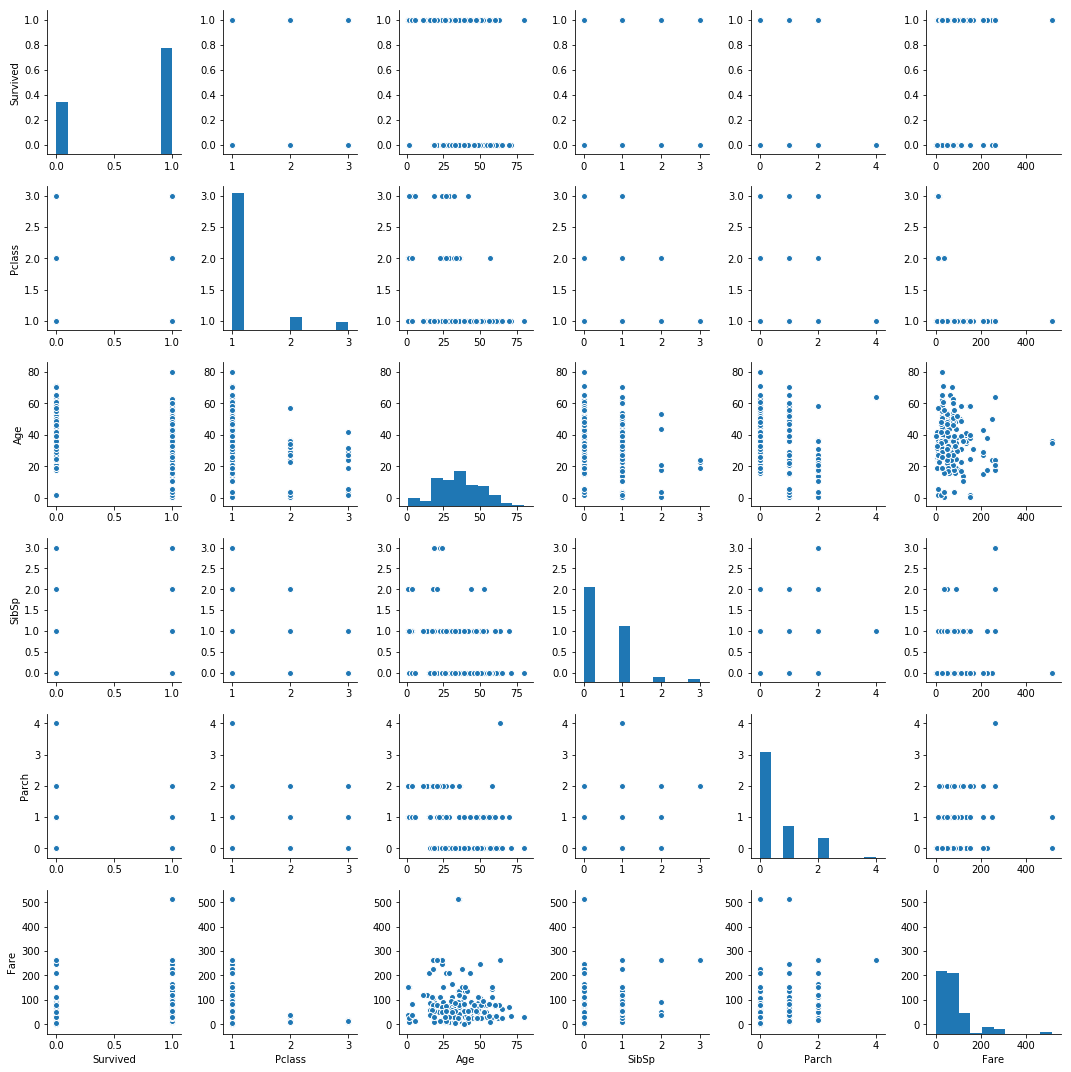

In [5]:
 g = sns.pairplot(titanic.dropna())

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

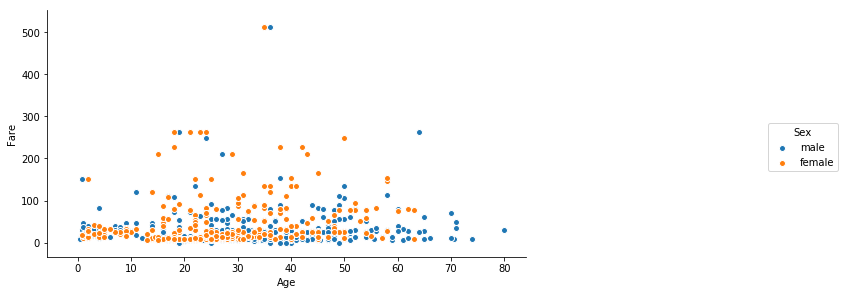

In [8]:
g = sns.pairplot(titanic,
                 x_vars=["Age"],
                 y_vars=["Fare"], hue="Sex")
g.fig.set_size_inches(15,5)

### Step 7. How many people survived?

In [5]:
sum(titanic['Survived'])

342

### Step 8. Create a histogram with the Fare payed

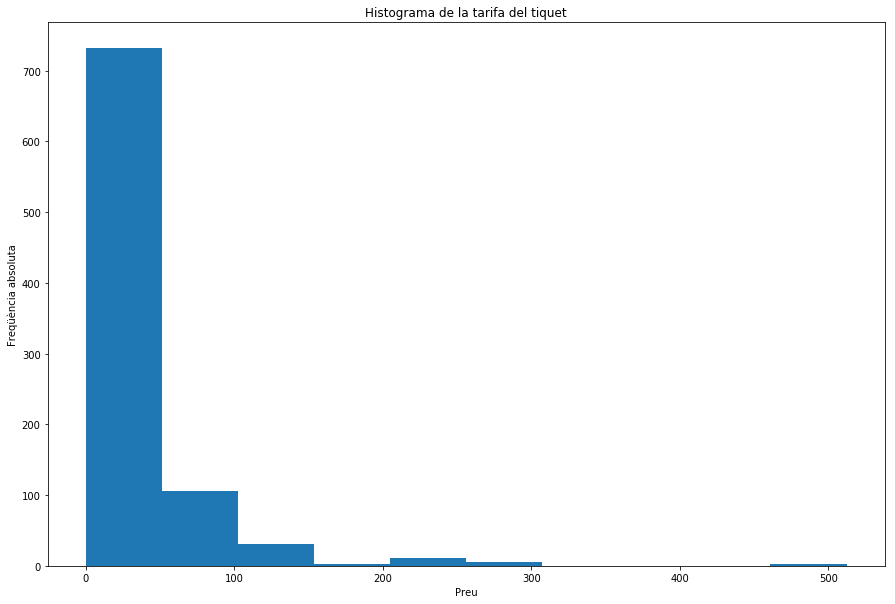

In [6]:
plt.hist(titanic['Fare'])
plt.title("Histograma de la tarifa del tiquet")
plt.xlabel("Preu")
plt.ylabel("Freqüència absoluta")
fig = plt.gcf()
fig.set_size_inches(15, 10)

### Step 9: Create a diagonal correlation plot af all variables ([tip](http://seaborn.pydata.org/examples/many_pairwise_correlations.html))

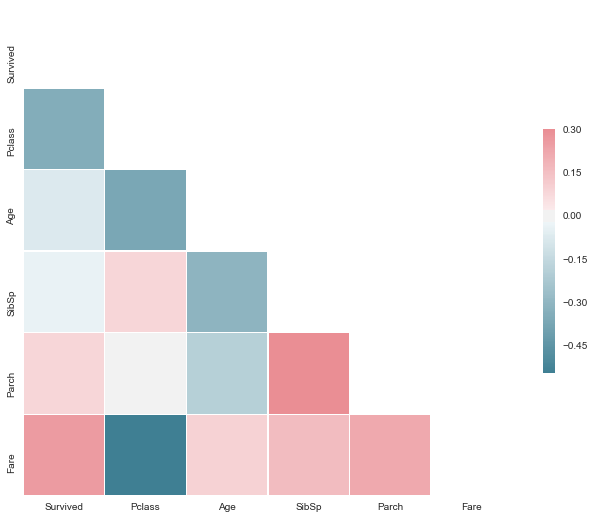

In [7]:
sns.set(style="white")

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})